# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dfCounting6 = pd.read_csv("Results6/quickSort-PC6.csv")
dfCounting6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting16 = pd.read_csv("Results16/quickSort-PC16.csv")
dfCounting16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting21 = pd.read_csv("Results21/quickSort-PC21.csv")
dfCounting21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting23 = pd.read_csv("Results23/quickSort-PC23.csv")
dfCounting23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV6 = pd.read_csv("Results6/readCSV-PC6.csv")
dfReadCSV6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV16 = pd.read_csv("Results16/readCSV-PC16.csv")
dfReadCSV16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
# 
dfReadCSV21 = pd.read_csv("Results21/readCSV-PC21.csv")
dfReadCSV21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV23 = pd.read_csv("Results23/readCSV-PC23.csv")
dfReadCSV23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

## Counting sort

In [2]:
def removeNonsense(df):
    df = df[df["PKG (J)"]>=0]
    df = df[df["CPU (J)"]>=0]
    df = df[df["Time (ms)"]>=0]
    return df

dfC6 = removeNonsense(dfCounting6)
dfC16 = removeNonsense(dfCounting16)
dfC21 = removeNonsense(dfCounting21)
dfC23 = removeNonsense(dfCounting23)


dfR6 = removeNonsense(dfReadCSV6)
dfR16 = removeNonsense(dfReadCSV16)
dfR21 = removeNonsense(dfReadCSV21)
dfR23 = removeNonsense(dfReadCSV23)


In [65]:
def makeinputColumn(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[0])

    df["Input case"] = l

#makeinputColumn(dfC6)
makeinputColumn(dfC16)
# makeinputColumn(dfC21)
# makeinputColumn(dfC23)
# print(dfC16)

def makeinputColumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[1].lower())
    df["Input case"] = l
    
# makeinputColumn_readCSV(dfR6)
makeinputColumn_readCSV(dfR16)
# makeinputColumn_readCSV(dfR21)
# makeinputColumn_readCSV(dfR23)


In [4]:
def makeSizecolumn(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[1]))

    df["Size"] = l
makeSizecolumn(dfC6)
makeSizecolumn(dfC16)
makeSizecolumn(dfC21)
makeSizecolumn(dfC23)

def makeSizecolumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[-1]))

    df["Size"] = l

# makeSizecolumn_readCSV(dfR6)
makeSizecolumn_readCSV(dfR16)
# makeSizecolumn_readCSV(dfR21)
# makeSizecolumn_readCSV(dfR23)

In [5]:
print(f"C6: {len(dfC6)}")
print(f"C16: {len(dfC16)}")
print(f"C21: {len(dfC21)}")
print(f"C23: {len(dfC23)}")
print(f"R6: {len(dfR6)}")
print(f"R16: {len(dfR16)}")
print(f"R21: {len(dfR21)}")
print(f"R23: {len(dfR23)}")

C6: 14069
C16: 14067
C21: 14070
C23: 14068
R6: 41599
R16: 41599
R21: 41599
R23: 41599


### remove outliers

In [6]:
def remove_outliers(df, type, size, col):
    q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
    q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
    IQR = q3 - q1 
    LF = q1 - 1.5* IQR
    UF = q3 + 1.5* IQR
    # print(col)
    # print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
    # print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
    #print(f"For size, case: {size},{type}. Lower fence: {LF} Upper fence: {UF}.")
    df = df[df["Input case"] == type][df["Size"]==size][df[col] <= UF]
    df = df[df["Input case"] == type][df["Size"]==size][df[col] >= LF]
    return df

In [7]:
def remove_outliers_for_pc(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    col = ["CPU (J)", "Memory (J)", "Temperature","Time (ms)", "PKG (J)"]
    for case in c:
        for size in s:
            for column in col:
                df = remove_outliers(df, case, size, column)
# remove_outliers_for_pc(dfC6)
# remove_outliers_for_pc(dfC16)
# remove_outliers_for_pc(dfC21)
# remove_outliers_for_pc(dfC23)
# remove_outliers_for_pc(dfR6)
# remove_outliers_for_pc(dfR16)
# remove_outliers_for_pc(dfR21)
# remove_outliers_for_pc(dfR23)

C:\Users\mathi\AppData\Local\Temp\ipykernel_98776\388745506.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\mathi\AppData\Local\Temp\ipykernel_98776\388745506.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\mathi\AppData\Local\Temp\ipykernel_98776\388745506.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["Input case"] == type][df["Size"]==size][df[col] <= UF]


In [8]:
print(f"C6: {len(dfC6)}")
print(f"C16: {len(dfC16)}")
print(f"C21: {len(dfC21)}")
print(f"C23: {len(dfC23)}")
print(f"R6: {len(dfR6)}")
print(f"R16: {len(dfR16)}")
print(f"R21: {len(dfR21)}")
print(f"R23: {len(dfR23)}")

C6: 14069
C16: 14067
C21: 14070
C23: 14068
R6: 41599
R16: 41599
R21: 41599
R23: 41599


In [9]:
def meanData(df,type,size):
    meandf = df[df["Input case"] == type][df["Size"]==size].mean()
    meandf["Input case"] = type
    return meandf

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    l = []
    for case in c:
        if case != "worst":
            for size in s:
                l.append(meanData(df, case, size))  
        else :
            for size in [25000,50000,75000,100000,200000,300000,400000,500000]:
                l.append(meanData(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

# meanC6 = mean_of_dataset(dfC6)
meanC16 = mean_of_dataset(dfC16)
# meanC21 = mean_of_dataset(dfC21)
# meanC23 = mean_of_dataset(dfC23)



C:\Users\mathi\AppData\Local\Temp\ipykernel_98776\64230234.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_98776\64230234.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_98776\64230234.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_98776\64230234.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid col

In [10]:
meanC16

,PKG (J),CPU (J),Memory (J),Temperature,Time (ms),Size,Input case
0,1.603815,1.366123,0.096176,59.26,187.543593,25000.0,best
1,2.161093,1.859081,0.131125,61.25,233.795242,50000.0,best
2,2.696685,2.333353,0.163701,63.9475,276.026345,75000.0,best
3,3.152685,2.73391,0.190914,65.89,315.825212,100000.0,best
4,4.18897,3.637285,0.249111,67.0375,417.551507,200000.0,best
...,...,...,...,...,...,...,...
146,6.65318,5.771539,0.362921,70.475,671.021975,600000.0,random10
147,7.016525,6.074104,0.375177,71.85,726.55195,700000.0,random10
148,7.675723,6.640553,0.408925,69.5,814.478425,800000.0,random10
149,8.371547,7.252245,0.435071,71.25,890.75345,900000.0,random10


In [11]:

def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(meanData(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans


# meanR6 = mean_of_dataset_readCSV(dfR6)
meanR16 = mean_of_dataset_readCSV(dfR16)
# meanR21 = mean_of_dataset_readCSV(dfR21)
# meanR23 = mean_of_dataset_readCSV(dfR23)

C:\Users\mathi\AppData\Local\Temp\ipykernel_98776\64230234.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_98776\64230234.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_98776\64230234.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_98776\64230234.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid col

In [12]:
meanC6 = meanC6.reset_index(drop=True)
meanC16 = meanC16.reset_index(drop=True)
meanC21 = meanC21.reset_index(drop=True)
meanC23 = meanC23.reset_index(drop=True)
meanR6 = meanR6.reset_index(drop=True)
meanR16 = meanR16.reset_index(drop=True)
meanR21 = meanR21.reset_index(drop=True)
meanR23 = meanR23.reset_index(drop=True)
meanC16

,PKG (J),CPU (J),Memory (J),Temperature,Time (ms),Size,Input case
0,1.603815,1.366123,0.096176,59.26,187.543593,25000.0,best
1,2.161093,1.859081,0.131125,61.25,233.795242,50000.0,best
2,2.696685,2.333353,0.163701,63.9475,276.026345,75000.0,best
3,3.152685,2.73391,0.190914,65.89,315.825212,100000.0,best
4,4.18897,3.637285,0.249111,67.0375,417.551507,200000.0,best
...,...,...,...,...,...,...,...
146,6.65318,5.771539,0.362921,70.475,671.021975,600000.0,random10
147,7.016525,6.074104,0.375177,71.85,726.55195,700000.0,random10
148,7.675723,6.640553,0.408925,69.5,814.478425,800000.0,random10
149,8.371547,7.252245,0.435071,71.25,890.75345,900000.0,random10


In [13]:
def makeCPU_sub_readCSV(meanC, meanR):
    lc = []
    lt = []
    lm = []

    for i in range(len(meanC["Size"])):
        case = meanC["Input case"][i]
        size = meanC["Size"][i]
        if case == "best":
                case2 = "countingbest"
        if case == "worst":
            case2 = "countingworst"
        if case.startswith("random"):
            case2 = "countingrandom"+case.split("m")[-1]

        Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
        Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lc.append(Cc-Rc)

        Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
        Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lt.append(Ct-Rt)

        Cm = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Memory (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Memory (J)"].index.tolist()[0]]
        Rm = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Memory (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Memory (J)"].index.tolist()[0]]
        lm.append(Cm-Rm)

    meanC["CPU - readCSV"] = lc
    meanC["Time - readCSV"] = lt
    meanC["Memory - readCSV"] = lm


makeCPU_sub_readCSV(meanC6, meanR6)
makeCPU_sub_readCSV(meanC16, meanR16)
makeCPU_sub_readCSV(meanC21, meanR21)
makeCPU_sub_readCSV(meanC23, meanR23)



C:\Users\mathi\AppData\Local\Temp\ipykernel_98776\3462347420.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\mathi\AppData\Local\Temp\ipykernel_98776\3462347420.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\mathi\AppData\Local\Temp\ipykernel_98776\3462347420.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
C:\Users\mathi\AppData\Local\Temp\ipykernel_98776\3462347420.py:21: UserWarning: B

In [14]:
print(meanC6[meanC6["Temperature"]<60])
print(meanC16[meanC16["Temperature"]<60])
print(meanC21[meanC21["Temperature"]<60])
print(meanC23[meanC23["Temperature"]<60])

     PKG (J)   CPU (J) Memory (J) Temperature   Time (ms)     Size Input case  \
21  1.977498  1.736253   0.130348   40.179487  238.615128  25000.0    random1   
34  2.029912  1.789046   0.131152      50.275   236.28875  25000.0    random2   
47  1.941576  1.714713   0.124905      55.125  221.306975  25000.0    random3   
60  1.958331  1.728461   0.125145      56.975  224.835925  25000.0    random4   
73  2.048402  1.805797   0.129143      58.675  240.432025  25000.0    random5   
86  1.974837  1.742776   0.125542      59.275  225.038075  25000.0    random6   
99  1.991693  1.751308   0.124495      59.825    224.6222  25000.0    random7   

    CPU - readCSV  Time - readCSV  Memory - readCSV  
21       0.023423       13.785978          0.008184  
34       0.069096       15.536225          0.009993  
47      -0.005122        1.862975          0.003424  
60       0.009740        3.875825          0.003809  
73       0.161543       17.619525          0.008594  
86       0.101706        8.

# PLOTS

In [15]:
def plotdf(X, Y, df, case, color):
    for i in range(len(df)):
        if df["Input case"][i].startswith(case):
            plt.plot( df[X][i],df[Y][i],"o", color = color)

In [16]:
def plotdfs(X, Y, dfs, case, colors, title):
    plt.figure(figsize=(10,7))

    for df, color in zip(dfs, colors):
        plotdf(X, Y, df, case, color)

    plt.title(title + f" for {case} case")
    for color, pc in zip(colors, ["PC16","PC21","PC23","PC6"]):
        plt.plot(0,0,"", color = color, label = pc)
    plt.legend(loc="upper left")
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()

In [17]:
listOfDF = [meanC16, meanC21, meanC23, meanC6]
colors = ["red", "green", "blue", "orange"]

In [18]:
def plotRandDFs(X, Y, dfs, case, colors, title):
    plt.figure(figsize=(10,7))
    for i in range(1,11):
        for df, color in zip(dfs, colors):
            plotdf(X, Y, df, case+str(i), color)

    plt.title(title + f" for {case} case")
    for color, pc in zip(colors, ["PC16","PC21","PC23","PC6"]):
        plt.plot(0,0,"", color = color, label = pc)
    plt.legend(loc="upper left")
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()

In [19]:
# case = "random"
# x = "Time (ms)"

# plotRandDFs(x, "CPU (J)", listOfDF, case, colors, "time v cpu")
# plotRandDFs(x, "Memory (J)", listOfDF, case, colors, "time v memory")
# plotRandDFs("Memory (J)", "CPU (J)", listOfDF, case, colors, "mem v cpu")


# BEST

In [20]:

# plotdfs("Size", "CPU - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting CPU for each PC")
# plotdfs("Size", "CPU (J)", listOfDF, "best", colors, "raw CPU (J) data from Counting for each PC")


In [21]:
# plotdfs("Size", "Time - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting Time for each PC")
# plotdfs("Size", "Time (ms)", listOfDF, "best", colors, "raw Time (ms) data from Counting for each PC")

In [22]:
# plotdfs("Size", "Memory - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting Memory for each PC")
# plotdfs("Size", "Memory (J)", listOfDF, "best", colors, "raw Memory (J) data from Counting for each PC")

In [23]:
# plotdfs("Size", "Temperature", listOfDF, "best", colors, "Temperature of Counting for each PC")

# WORST

In [24]:
# plotdfs("Size", "CPU - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting CPU for each PC")
# plotdfs("Size", "CPU (J)", listOfDF, "worst", colors, "raw CPU (J) data from Counting for each PC")

In [25]:
# plotdfs("Size", "Time - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting Time for each PC")
# plotdfs("Size", "Time (ms)", listOfDF, "worst", colors, "raw Time (ms) data from Counting for each PC")

In [26]:
# plotdfs("Size", "Memory - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting Memory for each PC")
# plotdfs("Size", "Memory (J)", listOfDF, "worst", colors, "raw Memory (J) data from Counting for each PC")

In [27]:
# plotdfs("Size", "Temperature", listOfDF, "worst", colors, "Temperature of Counting for each PC")

# RANDOM

In [28]:

# plotRandDFs("Size", "CPU - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting CPU for each PC")
# plotRandDFs("Size", "CPU (J)", listOfDF, "random", colors, "raw CPU (J) data from Counting for each PC")


In [29]:

# plotRandDFs("Size", "Time - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting Time for each PC")
# plotRandDFs("Size", "Time (ms)", listOfDF, "random", colors, "raw Time (ms) data from Counting for each PC")


In [30]:

# plotRandDFs("Size", "Memory - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting Memory for each PC")
# plotRandDFs("Size", "Memory (J)", listOfDF, "random", colors, "raw Memory (J) data from Counting for each PC")


In [31]:

# plotRandDFs("Size", "Temperature", listOfDF, "random", colors, "Temperature of Counting for each PC")


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter

def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, printR2Score = True, plotGraph = True):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.scatter(X, y, color=color, label=Label)
        if dg==1:
            plt.plot(X, y_poly, color=color,label= f"Linear regression", linewidth=2)
        else:
            plt.plot(X, y_poly, color=color,label= f"{dg}. dg polynomial regression", linewidth=2)
        #plt.legend(loc='upper left')
    #print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))
        


In [33]:
def getIndex(df,case,size):
    return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]



In [37]:
import math
def calcPercent(df):
    cpuPercent = []
    pkgPercent = []
    fullEC = []
    nlogn = []
    n2 = []
    for case in ["best", "worst", "random"]:
        if case == "best":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                nlogn.append(df["Size"][getIndex(df,case,size)] * math.log2(df["Size"][getIndex(df,case,size)]))
                n2.append(df["Size"][getIndex(df,case,size)] * df["Size"][getIndex(df,case,size)])
        elif case == "worst":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                nlogn.append(df["Size"][getIndex(df,case,size)] * math.log2(df["Size"][getIndex(df,case,size)]))
                n2.append(df["Size"][getIndex(df,case,size)] * df["Size"][getIndex(df,case,size)])
        else :
            for i in range(1,11):
                for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                    cpuPercent.append(df["CPU (J)"][getIndex(df,case+str(i),size)] / df["PKG (J)"][getIndex(df,case+str(i),size)] * 100)
                    pkgPercent.append(100)
                    fullEC.append(df["CPU - readCSV"][getIndex(df,case+str(i),size)]+df["Memory - readCSV"][getIndex(df,case+str(i),size)])
                    nlogn.append(df["Size"][getIndex(df,case+str(i),size)] * math.log2(df["Size"][getIndex(df,case+str(i),size)]))
                    n2.append(df["Size"][getIndex(df,case+str(i),size)] * df["Size"][getIndex(df,case+str(i),size)])

    df["CPU % of PKG"] = cpuPercent
    df["PKG %"] = pkgPercent
    df["full EC"] = fullEC
    df["nlog(n)"] = nlogn 
    df["n^2"] = n2

In [38]:
for df in listOfDF:
    calcPercent(df)

C:\Users\mathi\AppData\Local\Temp\ipykernel_98776\279826804.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]
C:\Users\mathi\AppData\Local\Temp\ipykernel_98776\279826804.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]
C:\Users\mathi\AppData\Local\Temp\ipykernel_98776\279826804.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]
C:\Users\mathi\AppData\Local\Temp\ipykernel_98776\279826804.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


In [39]:
meanC16

,PKG (J),CPU (J),Memory (J),Temperature,Time (ms),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC,nlog(n),n^2
0,1.603815,1.366123,0.096176,59.26,187.543593,25000.0,best,-0.203006,-15.154147,-0.008846,85.179593,100,-0.211852,3.652410e+05,6.250000e+08
1,2.161093,1.859081,0.131125,61.25,233.795242,50000.0,best,-0.124295,-4.112068,0.001214,86.025037,100,-0.123081,7.804820e+05,2.500000e+09
2,2.696685,2.333353,0.163701,63.9475,276.026345,75000.0,best,0.002305,8.028900,0.011982,86.526700,100,0.014287,1.214595e+06,5.625000e+09
3,3.152685,2.73391,0.190914,65.89,315.825212,100000.0,best,0.117105,19.758337,0.022222,86.716887,100,0.139327,1.660964e+06,1.000000e+10
4,4.18897,3.637285,0.249111,67.0375,417.551507,200000.0,best,0.140514,30.710362,0.025269,86.830060,100,0.165783,3.521928e+06,4.000000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,6.65318,5.771539,0.362921,70.475,671.021975,600000.0,random10,0.591603,71.497975,0.041722,86.748583,100,0.633325,1.151676e+07,3.600000e+11
147,7.016525,6.074104,0.375177,71.85,726.55195,700000.0,random10,0.517911,67.754125,0.036075,86.568552,100,0.553986,1.359190e+07,4.900000e+11
148,7.675723,6.640553,0.408925,69.5,814.478425,800000.0,random10,0.636821,85.613025,0.052165,86.513714,100,0.688986,1.568771e+07,6.400000e+11
149,8.371547,7.252245,0.435071,71.25,890.75345,900000.0,random10,0.820374,100.385425,0.059262,86.629683,100,0.879636,1.780161e+07,8.100000e+11


In [40]:

def plotStack(df, case, dfName, top, bottom):
    plt.figure(figsize=(10,7))
    cpu = sns.lineplot(df[df["Input case"] == case]["Size"], top, color="red")
    pkg = sns.lineplot(df[df["Input case"] == case]["Size"], bottom, color="green")
    cpuLine = cpu.lines[0]
    pkgLine = pkg.lines[0]

    cpuX = cpuLine.get_xydata()[:, 0]
    cpuY = cpuLine.get_xydata()[:, 1]
    pkgX = pkgLine.get_xydata()[:, 0]
    pkgY = pkgLine.get_xydata()[:, 1]

    pkg.fill_between(pkgX, pkgY, color="green", alpha=0.3)
    pkg.margins(x=0, y=0)
    cpu.fill_between(cpuX, cpuY, color="red", alpha=1)
    cpu.margins(x=0, y=0)
    
    
    #plt.ylim(0,110)
    plt.title(f"Quick sort EC distribution between CPU and Memory for {dfName} for {case} case")
    plt.legend()
    plt.xlabel("Input size")
    plt.ylabel("Joule")
    plt.show()


c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


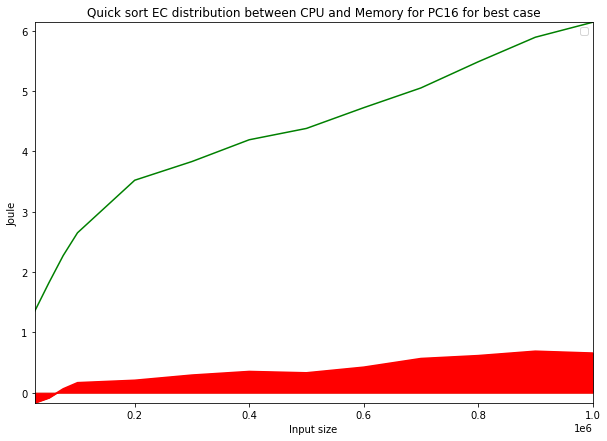

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


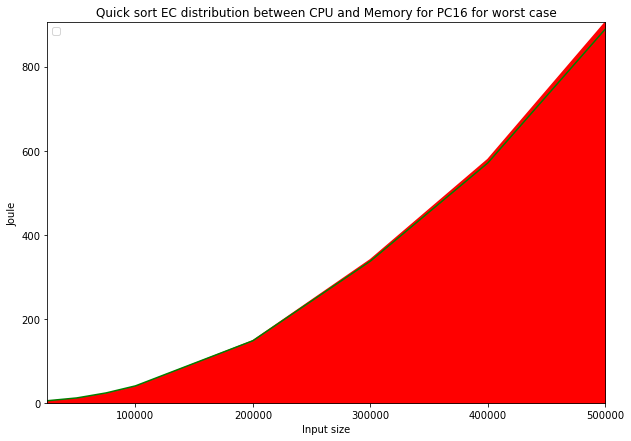

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


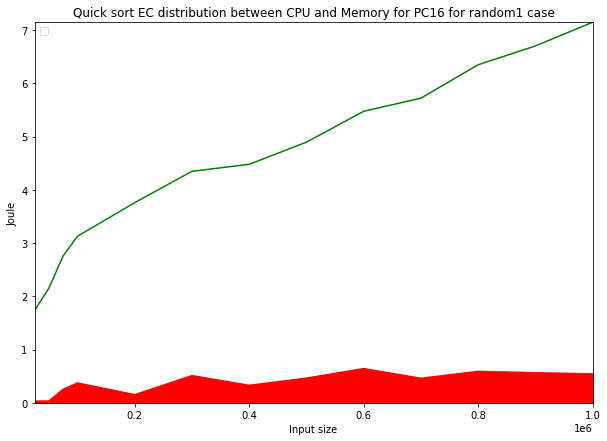

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


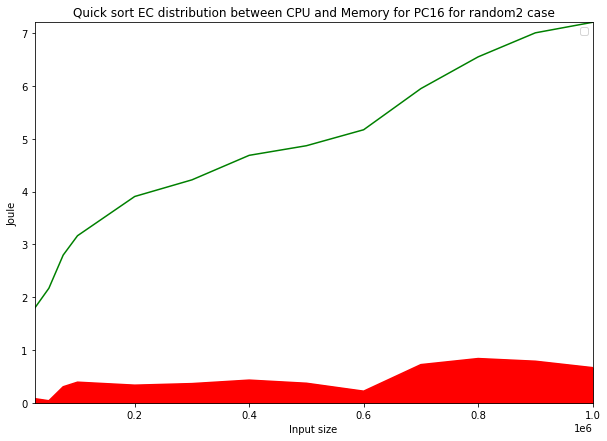

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


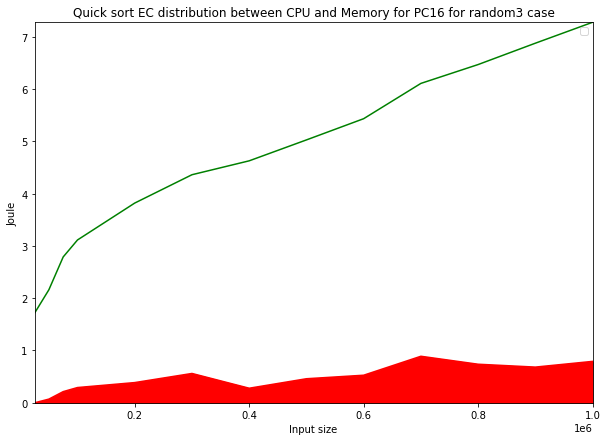

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


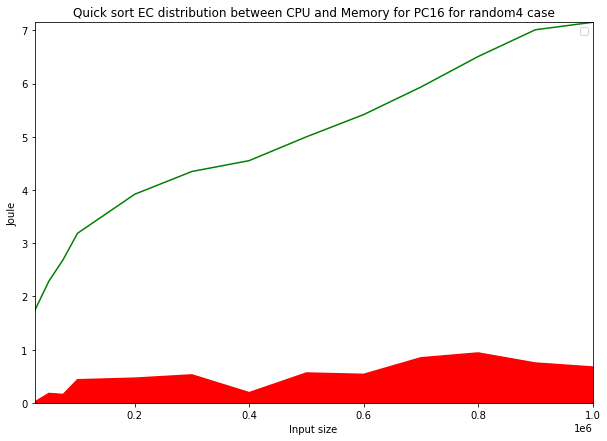

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


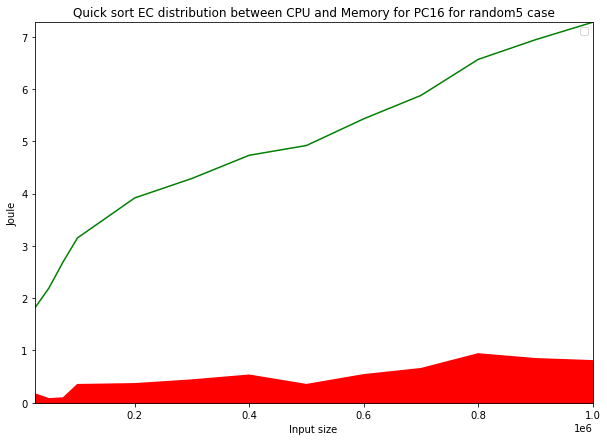

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


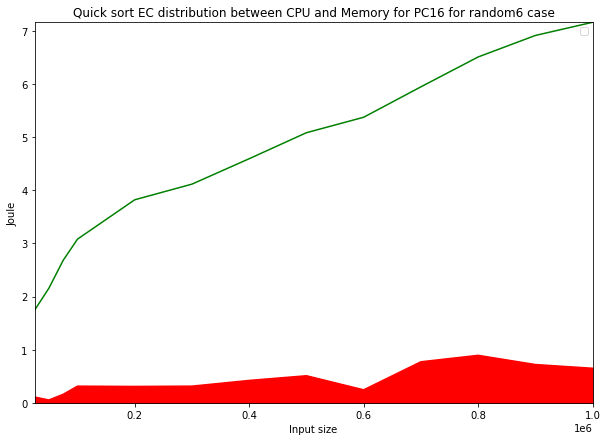

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


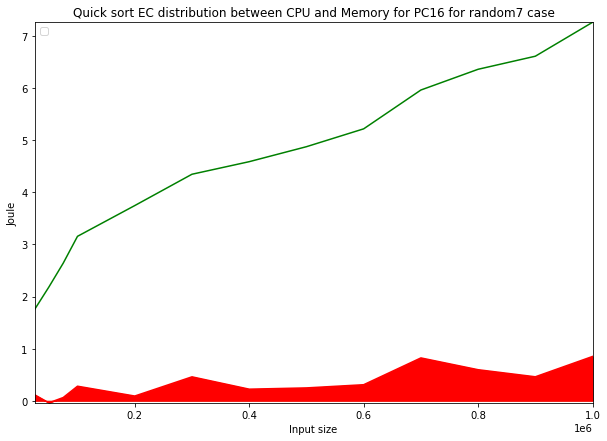

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


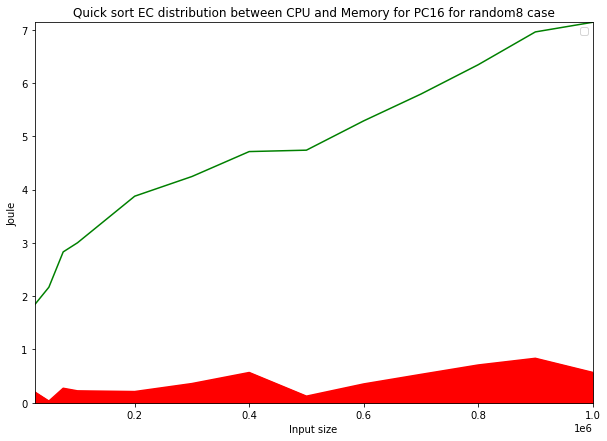

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


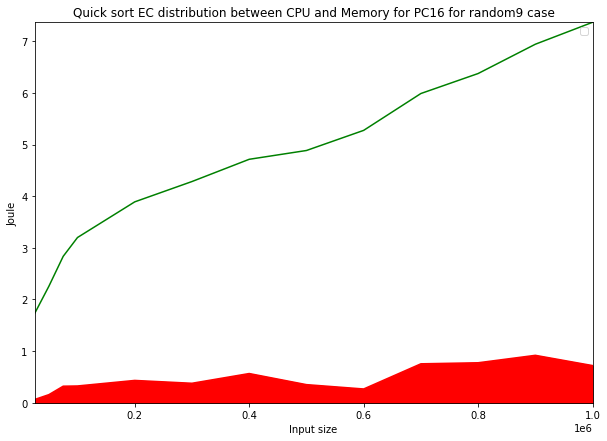

c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


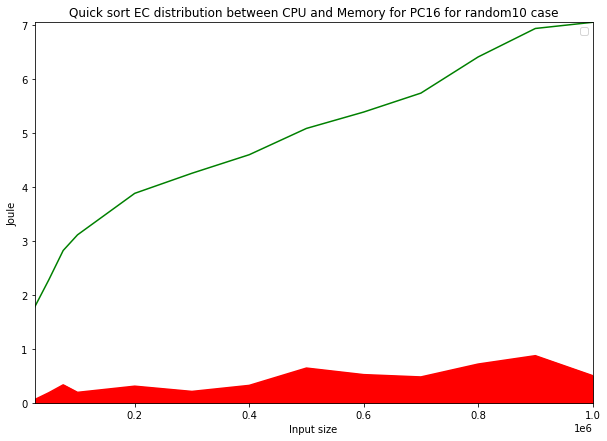

In [41]:
for case in ["best", "worst", "random"]:
        if case != "random":
            plotStack(meanC16, case, "PC16", df[df["Input case"] == case]["full EC"], df[df["Input case"] == case]["CPU (J)"])
        else :
            for i in range(1,11):
                plotStack(meanC16, case+str(i), "PC16",df[df["Input case"] == case+str(i)]["full EC"], df[df["Input case"] == case+str(i)]["CPU (J)"] )

25.830503760218562 [0.00000000e+00 8.37592440e-04 5.42302792e-07]
worst R2  0.9998484648932623 



Text(0, 0.5, 'Time (ms) -readCSV')

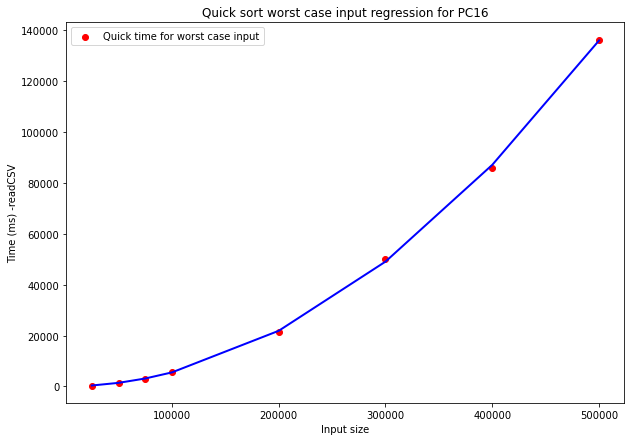

In [42]:
plt.figure(figsize=(10,7))
color = "red"

# best = polyReg(meanC16[meanC16["Input case"] == "best"]["Size"], meanC16[meanC16["Input case"] == "best"]["Time - readCSV"],2, "Quick time for best case input", "green")
worst = polyReg(meanC16[meanC16["Input case"] == "worst"]["Size"], meanC16[meanC16["Input case"] == "worst"]["Time - readCSV"],2, "Quick time for worst case input", "red")

print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
plt.title("Quick sort worst case input regression for PC16")
plt.xlabel("Input size")
plt.ylabel("Time (ms) -readCSV")


# Time vs. big-oh

worst R2  0.9999218153095906 



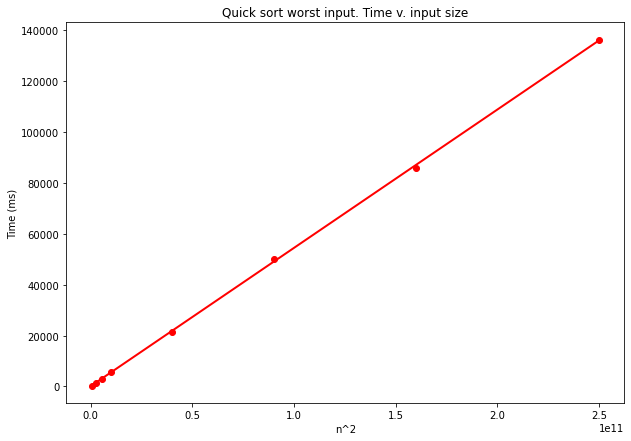

random1 R2 0.854936543135456  

random1 R2 0.7418821902896504  

random1 R2 0.8956384463811244  

random1 R2 0.9042416013951755  

random1 R2 0.9353724547299949  

random1 R2 0.8173182848043707  

random1 R2 0.8750299214106774  

random1 R2 0.8383649440489528  

random1 R2 0.9117658315715098  

random1 R2 0.7858973872835492  

best R2  0.8887068818406914 



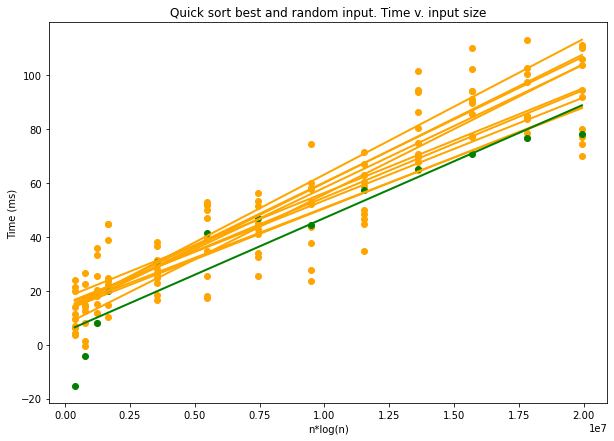

In [80]:
plt.figure(figsize=(10,7))
color = "red"
Rs = []
print(f"worst R2 ", worst[1], "\n")
worst = polyReg(meanC16[meanC16["Input case"] == "worst"]["n^2"], meanC16[meanC16["Input case"] == "worst"]["Time - readCSV"],1, "Quick time for worst case input", "red")
plt.title("Quick sort worst input. Time v. input size")
plt.xlabel("n^2")
plt.ylabel("Time (ms)")
plt.show()

plt.figure(figsize=(10,7))
for i in range(1,11):
    Rs.append(polyReg(meanC16[meanC16["Input case"] == f"random{i}"]["nlog(n)"], meanC16[meanC16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "orange"))
for i in range(len(Rs)):
    print("random1 R2", Rs[i][1], " \n")
best = polyReg(meanC16[meanC16["Input case"] == "best"]["nlog(n)"], meanC16[meanC16["Input case"] == "best"]["Time - readCSV"],1, "Quick time for best case input", "green")
print(f"best R2 ", best[1], "\n")
plt.title("Quick sort best and random input. Time v. input size")
plt.xlabel("n*log(n)")
plt.ylabel("Time (ms)")
plt.show()


# E v. T

worst R2  0.9998479878054799 



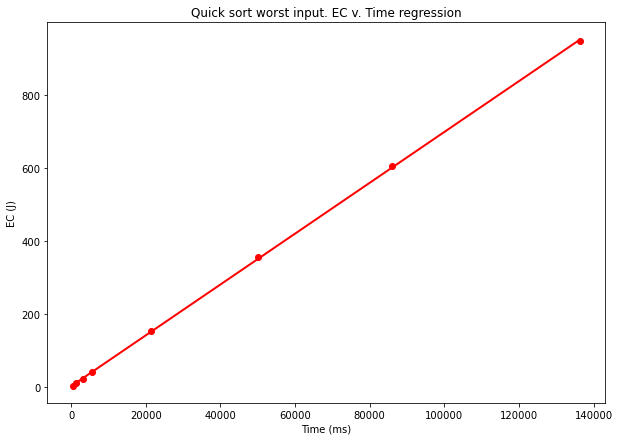

random1 R2 0.85104815007647  

random1 R2 0.8968842568470768  

random1 R2 0.9263448837640854  

random1 R2 0.9495346801978157  

random1 R2 0.8979097737766979  

random1 R2 0.964728339184222  

random1 R2 0.8874277013610109  

random1 R2 0.9282680331274322  

random1 R2 0.8782232733725361  

random1 R2 0.9607748075472874  

best R2  0.9845477070168678 



Text(0, 0.5, 'EC (J)')

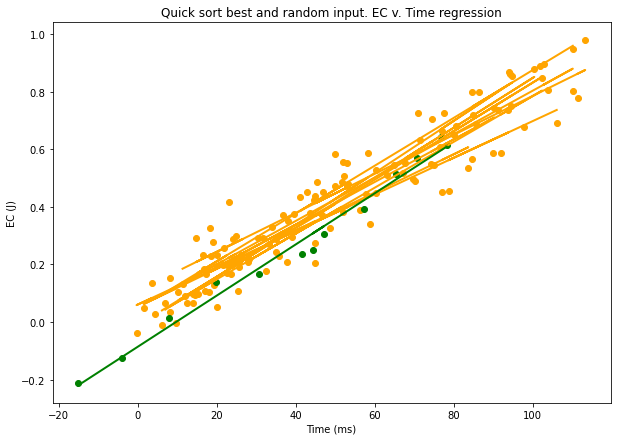

In [81]:
plt.figure(figsize=(10,7))
color = "red"
Rs = []
print(f"worst R2 ", worst[1], "\n")
worst = polyReg(meanC16[meanC16["Input case"] == "worst"]["Time - readCSV"], meanC16[meanC16["Input case"] == "worst"]["full EC"],1, "Quick time for worst case input", "red")
plt.title("Quick sort worst input. EC v. Time regression")
plt.xlabel("Time (ms)")
plt.ylabel("EC (J)")
plt.show()

plt.figure(figsize=(10,7))
for i in range(1,11):
    Rs.append(polyReg(meanC16[meanC16["Input case"] == f"random{i}"]["Time - readCSV"], meanC16[meanC16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "orange"))
for i in range(len(Rs)):
    print("random1 R2", Rs[i][1], " \n")
best = polyReg(meanC16[meanC16["Input case"] == "best"]["Time - readCSV"], meanC16[meanC16["Input case"] == "best"]["full EC"],1, "Quick time for best case input", "green")
print(f"best R2 ", best[1], "\n")
plt.title("Quick sort best and random input. EC v. Time regression")
plt.xlabel("Time (ms)")
plt.ylabel("EC (J)")


# EC v. big-oh

worst R2  0.9999218153095906 



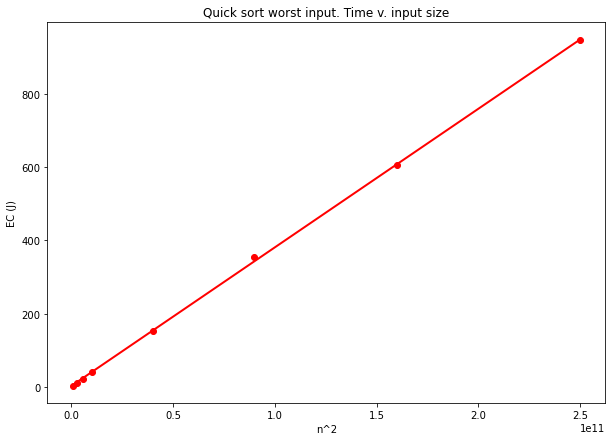

random1 R2 0.5869377213449337  

random1 R2 0.6113410337749154  

random1 R2 0.7524175470681075  

random1 R2 0.8482657612633699  

random1 R2 0.8289334461554965  

random1 R2 0.7383589593373879  

random1 R2 0.6201589947957035  

random1 R2 0.7363483270755147  

random1 R2 0.7071529154847904  

random1 R2 0.627074054378058  

best R2  0.8989378240077974 



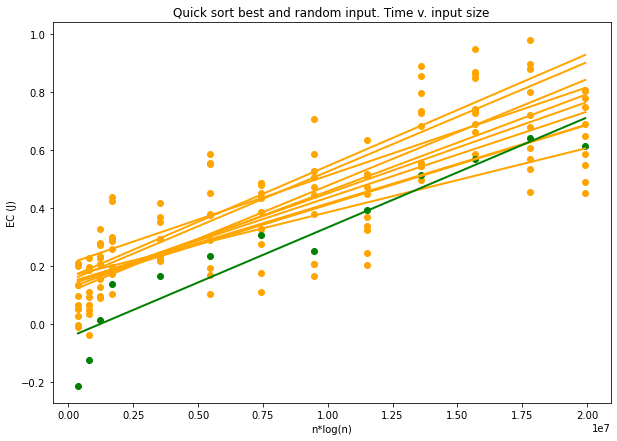

In [82]:
plt.figure(figsize=(10,7))
color = "red"
Rs = []
print(f"worst R2 ", worst[1], "\n")
worst = polyReg(meanC16[meanC16["Input case"] == "worst"]["n^2"], meanC16[meanC16["Input case"] == "worst"]["full EC"],1, "Quick time for worst case input", "red")
plt.title("Quick sort worst input. Time v. input size")
plt.xlabel("n^2")
plt.ylabel("EC (J)")
plt.show()

plt.figure(figsize=(10,7))
for i in range(1,11):
    Rs.append(polyReg(meanC16[meanC16["Input case"] == f"random{i}"]["nlog(n)"], meanC16[meanC16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "orange"))
for i in range(len(Rs)):
    print("random1 R2", Rs[i][1], " \n")
best = polyReg(meanC16[meanC16["Input case"] == "best"]["nlog(n)"], meanC16[meanC16["Input case"] == "best"]["full EC"],1, "Quick time for best case input", "green")
print(f"best R2 ", best[1], "\n")
plt.title("Quick sort best and random input. Time v. input size")
plt.xlabel("n*log(n)")
plt.ylabel("EC (J)")
plt.show()


0.4843292013581415 [ 0.00000000e+00  7.55519426e-03 -1.07833248e-06]
f(x) = 0.00070729 x +  644.5733176424646 
$f(x) = 7.55519426*10^{-3} * x^2 - 1.0783324810^{-6} * x + 0.4843292013581415$